In [1]:
import pandas as pd


TOOLS = ["COTAN", "Seurat", "Monocle", "Scanpy", "scvi-tools", "Intersection"]
DATASETS = sorted(["Tabula Muris Heart", "Tabula Muris Marrow", "PBMC TotalSeq", "Zheng 4", "Zheng 8"]) # sort just in case names will be changed

path = '../results/aggregate/enrichment_scores.csv'

scores_df = pd.read_csv(path)

In [2]:
##### plot

import matplotlib.pyplot as plt
import numpy as np

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler('color', plt.get_cmap('Set2').colors)

means = {}

scores_df = scores_df.sort_values(by='dataset')
scores_df

,dataset,n_clusters,COTAN,Seurat,Monocle,Scanpy,SCVI,Intersection
2,Peripheral Blood,11,2.5,5.0,5.5,5.5,6.0,4.5
0,Tabula Muris Heart,5,5.0,5.0,5.0,5.0,5.0,5.0
1,Tabula Muris Marrow,14,9.5,9.5,10.0,9.0,9.5,6.0
3,Zheng 4,4,1.5,2.0,2.0,2.5,2.5,2.5
4,Zheng 8,8,2.0,3.5,5.5,4.5,4.0,4.0


In [3]:
for tool in TOOLS:
	# get scores percentage for each dataset
	tool_scores = scores_df[tool] / scores_df['n_clusters']
	# round to 2 decimal places
	tool_scores = tool_scores.round(2)
	
	if not tool_scores.empty:
		# generate tuple of scores for each dataset in order
		means[tool] = tuple(x for x in tool_scores)

means

{'COTAN': (0.23, 1.0, 0.68, 0.38, 0.25),
 'Seurat': (0.45, 1.0, 0.68, 0.5, 0.44),
 'Monocle': (0.5, 1.0, 0.71, 0.5, 0.69),
 'Scanpy': (0.5, 1.0, 0.64, 0.62, 0.56),
 'SCVI': (0.55, 1.0, 0.68, 0.62, 0.5),
 'Intersection': (0.41, 1.0, 0.43, 0.62, 0.5)}

In [4]:
def enrichment_bar_plot(score_data, dataset_names, tool_count, percentage=True):
    means = score_data
    x = np.arange(len(dataset_names))  # the label locations
    width = 1/(tool_count+1)  # the width of the bars
    multiplier = 0
    
    fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))
    max_height = 1
    min_height = 0

    for attribute, measurement in means.items():
        # max in mesurement
        if percentage:
            measurement = tuple(x * 100 for x in measurement)
            max_measurement = max(measurement)
            if max_measurement > max_height:
                max_height = max_measurement
            min_measurement = min(measurement)
            if min_measurement < min_height:
                min_height = min_measurement

        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        padding = -10
        ax.bar_label(rects, padding=padding, fontsize=8)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    if percentage:
        ax.set_ylabel('Cell identification %')
    else:
        ax.set_ylabel('Cell identification')

    middle_offset = width * ((tool_count-1) / 2)
    ax.set_xticks(x + middle_offset, dataset_names)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    if percentage:
        ax.set_ylim(0, 100)
    else:
        ax.set_ylim(min_height, max_height)
    plt.show()

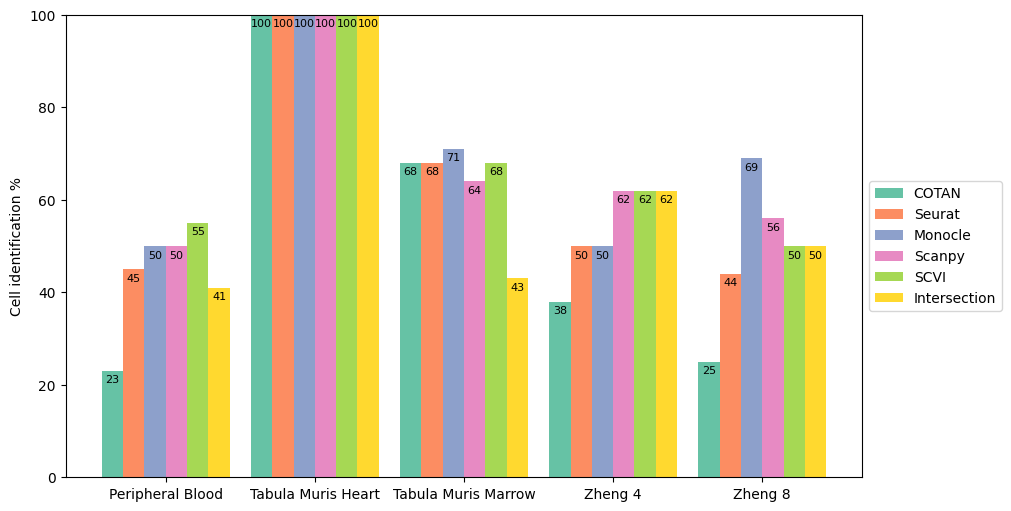

In [5]:
enrichment_bar_plot(means, DATASETS, len(TOOLS))